<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Qiskit_based_electronic_bandstructure_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip  install jarvis-tools qiskit

     |████████████████████████████████| 942kB 4.6MB/s 
     |████████████████████████████████| 296kB 18.1MB/s 
     |████████████████████████████████| 6.1MB 12.3MB/s 
     |████████████████████████████████| 18.0MB 112kB/s 
     |████████████████████████████████| 235kB 39.4MB/s 
     |████████████████████████████████| 215kB 38.0MB/s 
     |████████████████████████████████| 2.1MB 32.6MB/s 
     |████████████████████████████████| 33.9MB 80kB/s 
     |████████████████████████████████| 952kB 40.8MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 1.5MB 29.4MB/s 
     |████████████████████████████████| 194kB 40.0MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 645kB 29.3MB/s 
     |████████████████████████████████| 3.2MB 21.6MB/s 
     |████████████████████████████████| 6.3MB 34.7MB/s 
  Created wheel for qiskit: filename=qiskit-0.28.0-cp37-none-any.whl size=11091 sha256=ecc2206e9f3ba5529b77601

In [2]:
from jarvis.db.figshare import get_wann_electron, get_wann_phonon, get_hk_tb
from jarvis.io.qiskit.inputs import HermitianSolver
from jarvis.core.circuits import QuantumCircuitLibrary
from qiskit import Aer

backend = Aer.get_backend("statevector_simulator")
# Aluminum JARVIS-ID: JVASP-816
wtbh, Ef, atoms = get_wann_electron("JVASP-816")
kpt = [0.5, 0., 0.5] # X-point
hk = get_hk_tb(w=wtbh, k=kpt)
HS = HermitianSolver(hk)
n_qubits = HS.n_qubits()
circ = QuantumCircuitLibrary(n_qubits=n_qubits).circuit6()
en, vqe_result, vqe = HS.run_vqe(var_form=circ, backend=backend)
vals,vecs = HS.run_numpy()
# Ef: Fermi-level
print('Classical, VQE (eV):', vals[0]-Ef, en-Ef)
print('Show model\n', circ)

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


Obtaining raw io files 145k...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 6.00M/6.00M [00:02<00:00, 2.78MiB/s]


Loading the zipfile...
Loading completed.
H size 15 13 15 8 8


/usr/local/lib/python3.7/dist-packages/qiskit/aqua/operators/legacy/op_converter.py:90: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  num_processes=aqua_globals.num_processes)
/usr/local/lib/python3.7/dist-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')
/usr/local/lib/python3.7/dist-packages/qiskit/aqua/algorithms/vq_algorithm.py:72: DeprecationWarning: The class qiskit.aqua.algorithms.VQAlgorithm is deprecated. It was moved/refactored to qiskit.algori

Classical, VQE (eV): -3.04371678528499 -3.0437090728343312
Show model
      ┌──────────┐┌──────────┐          ┌──────────┐┌──────────┐             
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[3]) ├──■────■──┤ Ry(θ[6]) ├┤ Rz(θ[9]) ├─────────────
     ├──────────┤├──────────┤┌─┴─┐  │  └──────────┘├──────────┤┌───────────┐
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[4]) ├┤ X ├──┼───────■──────┤ Ry(θ[7]) ├┤ Rz(θ[10]) ├
     ├──────────┤├──────────┤└───┘┌─┴─┐   ┌─┴─┐    ├──────────┤├───────────┤
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[5]) ├─────┤ X ├───┤ X ├────┤ Ry(θ[8]) ├┤ Rz(θ[11]) ├
     └──────────┘└──────────┘     └───┘   └───┘    └──────────┘└───────────┘


In [4]:
from jarvis.io.qiskit.inputs import get_bandstruct

kpts 24
kp= 0 [0.0, 0.0, 0.0]
np_vals [-3.24066445 -3.16463202 21.64459304 21.66631242 21.68275108 21.7124318
 21.73906807 21.75494905]
vqe_vals [-3.24066399 -3.16461368 21.6444458  21.66445283 21.68668422 21.70814695
 21.73145975 21.75476713]
kp= 1 [0.25, 1.7967564939297314e-17, 0.25]
np_vals [-0.99045319 -0.91496282 16.11225158 16.12899456 16.16829145 16.18771485
 16.87352861 16.95579697]
vqe_vals [-0.99045182 -0.91495903 16.11393736 16.1282727  16.16826795 16.18736778
 16.87322248 16.95511336]
kp= 2 [0.5, 3.593512987859463e-17, 0.5]
np_vals [ 4.88519509  4.95713807  6.16090983  6.24112862 13.26135091 13.27946273
 13.33681169 13.35498806]
vqe_vals [ 4.8852118   4.95713963  6.16091127  6.24116601 13.26116364 13.27941265
 13.32862588 13.3549877 ]
kp= 3 [0.5, 3.593512987859463e-17, 0.5]
np_vals [ 4.88519509  4.95713807  6.16090983  6.24112862 13.26135091 13.27946273
 13.33681169 13.35498806]
vqe_vals [ 4.88520514  4.95716179  6.16091608  6.24118222 13.25981471 13.27909018
 13.32311782 1

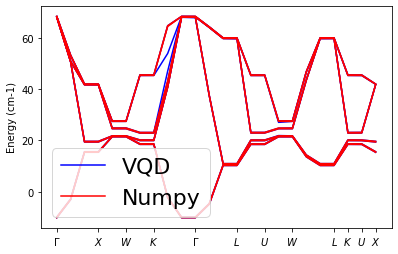

{'ef': 0,
 'eigvals_np': [[-10.175686370472006,
   -9.93694454887241,
   67.9640221443147,
   68.03222100770172,
   68.0838384002764,
   68.17703586217682,
   68.26067374533606,
   68.31054001953848],
  [-3.110023027374121,
   -2.872983261326931,
   50.592469945859676,
   50.64504292986912,
   50.76843514202979,
   50.82942462611683,
   52.98287984025771,
   53.24120248456805],
  [15.33951259740513,
   15.565413544441732,
   19.345256864373383,
   19.597143858621227,
   41.64064184898809,
   41.69751297638366,
   41.87758870651629,
   41.93466250327049],
  [15.33951259740513,
   15.565413544441732,
   19.345256864373383,
   19.597143858621227,
   41.64064184898809,
   41.69751297638366,
   41.87758870651629,
   41.93466250327049],
  [21.384033390854203,
   21.5199112978246,
   21.608868090806485,
   21.745684793149977,
   24.520054335879568,
   24.804659017099063,
   27.382108258691996,
   27.5855023156942],
  [21.384033390854203,
   21.5199112978246,
   21.608868090806485,
   21.74568

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# It's going to be very crude bandstructure, just for learning purposes
# Increase line_density and number of reps in qircuit model to get better quality plot
get_bandstruct(w=wtbh,atoms=atoms, savefig=False)
# Scroll down to see th plot